In [1]:
from matplotlib import pyplot
import os

from summer.utils import ref_times_to_dti
from autumn.core.plots.utils import REF_DATE
from autumn.core.project import get_project, load_timeseries
from autumn.settings.region import Region

In [2]:
project = get_project("sm_covid2", Region.FRANCE)

In [3]:
default_params = project.param_set.baseline
model = project.build_model(default_params.to_dict()) 

In [4]:
all_targets = project.plots
for target in all_targets:
    all_targets[target]['times'] = ref_times_to_dti(REF_DATE, all_targets[target]['times'])  

In [8]:
update_params = {

}
params = default_params.update(update_params, calibration_format=True)


In [9]:
model.run(params.to_dict())
derived_df = model.get_derived_outputs_df()

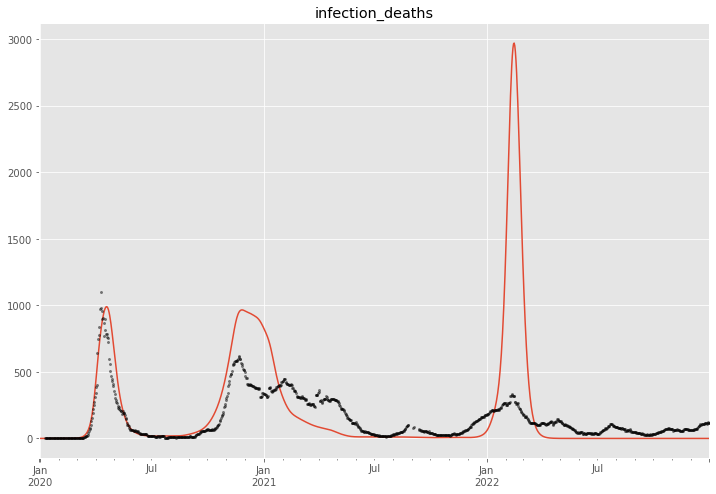

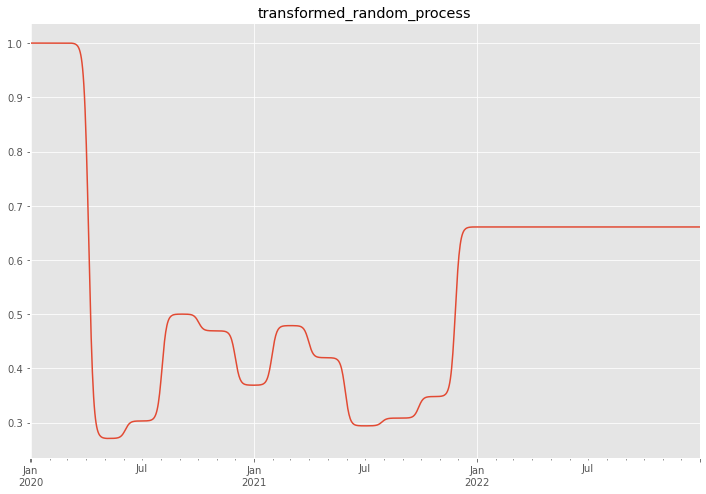

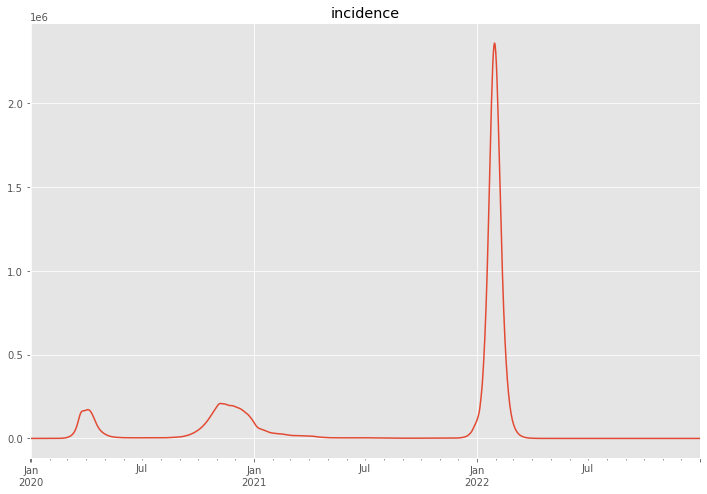

In [10]:
outputs = ["infection_deaths", "transformed_random_process", "incidence"] #, "prop_ever_infected"] #, "hospital_admissions", "hospital_occupancy", "icu_admissions", "icu_occupancy"]

for output in outputs:
    fig = pyplot.figure(figsize=(12, 8))
    pyplot.style.use("ggplot")
    axis = fig.add_subplot()

    axis = derived_df[output].plot()
    axis.set_title(output)
    
    if output in all_targets:
        # all_targets[output].plot.line(ax=axis, linewidth=0., markersize=10., marker="o")
        axis.scatter(all_targets[output]['times'], all_targets[output]['values'], color="k", s=5, alpha=0.5, zorder=10)         
